Somewhat of a warning: I'm starting with the speed dating data per my intuition/personal reasons. However, in my thoughts I wanted to analyze the divorce data first. Hence, it'll still keep the i.

Anyways, here's the speeddating data. See readme for more information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/speeddating.csv')
print(df.shape)
df.head()

(8378, 123)


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


Oh boy, forgot we have so many columns... Yeah, we're going to need to bust out the data dictionary already.



In [3]:
# exceptions = ['id']

r = df.shape[0]

for i in df.columns:
#     if len(df[i].unique()) == df.shape[0] and i not in exceptions:
    if len(df[i].unique()) == r:
        df = df.drop([i], axis=1)
        print(f"Just dropped {i} as it wasn't adding any value whatsoever to our model.")
#     else:
#         print(f"Well, {i} has {len(df[i].unique())} unique fields, so we'll keep it...for now!")

In [4]:
#Odd I didn't have the parallel of dropping a feature that only ever has one value. Regardless:

# exceptions = ['id']

r = df.shape[0] #In case I change something

for i in df.columns:
#     if len(df[i].unique()) == df.shape[0] and i not in exceptions:
    if df[i].value_counts().iloc[0] == r:
        df = df.drop([i], axis=1)
        print(f"Just dropped {i} as it wasn't adding any value whatsoever to our model.")
#     else:
#         print(f"Well, {i} has {len(df[i].unique())} unique fields, so we'll keep it...for now!")

Just dropped has_null as it wasn't adding any value whatsoever to our model.


In [5]:
if sum(df.isnull().sum())==0:
    print("Phew, no nulls in our entire dataframe!")
else:
    print(f"Unfortunately, we have {len(df.columns[df.isnull().any()])} columns that have nulls:")
    print(df.columns[df.isnull().any()])

Unfortunately, we have 57 columns that have nulls:
Index(['age', 'age_o', 'importance_same_race', 'importance_same_religion',
       'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
       'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive', 'sincere', 'intelligence',
       'funny', 'ambition', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'interests_correlate', 'expected_happy_with_sd_people',
       

In [6]:
#Hmm, let's get focused on datatypes now... likely should get into the habit of that.

df.dtypes.value_counts()

object     63
float64    59
Name: count, dtype: int64

In [7]:
object_df = df.select_dtypes(include=['object'])
object_df.head()

,gender,d_d_age,race,race_o,samerace,d_importance_same_race,d_importance_same_religion,field,d_pref_o_attractive,d_pref_o_sincere,...,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked,decision,decision_o,match
0,b'female',b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',b'[2-5]',b'[2-5]',b'Law',b'[21-100]',b'[16-20]',...,b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]',b'1',b'0',b'0'
1,b'female',b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',b'[2-5]',b'[2-5]',b'Law',b'[21-100]',b'[0-15]',...,b'[0-5]',b'[0.33-1]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]',b'1',b'0',b'0'
2,b'female',b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',b'[2-5]',b'[2-5]',b'Law',b'[16-20]',b'[16-20]',...,b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[0-4]',b'1',b'1',b'1'
3,b'female',b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',b'[2-5]',b'[2-5]',b'Law',b'[21-100]',b'[0-15]',...,b'[0-5]',b'[0.33-1]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]',b'1',b'1',b'1'
4,b'female',b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',b'[2-5]',b'[2-5]',b'Law',b'[21-100]',b'[0-15]',...,b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]',b'1',b'1',b'1'


In [36]:
#Oh boy... way more than I thought... eh, whatever we'll do objects here I guess. Hopefully salvaging some of them. Regardles
#they still need to be analyzed. 

step = 0

object_df.describe().T[step:step+10]

,count,unique,top,freq
gender,8378,2,b'male',4194
d_d_age,8378,4,b'[2-3]',2406
race,8378,6,b'European/Caucasian-American',4727
race_o,8378,6,b'European/Caucasian-American',4722
samerace,8378,2,b'0',5062
d_importance_same_race,8378,3,b'[2-5]',3104
d_importance_same_religion,8378,3,b'[0-1]',3111
field,8378,260,b'Business',521
d_pref_o_attractive,8378,3,b'[21-100]',3010
d_pref_o_sincere,8378,3,b'[16-20]',3820


I suppose we'll do some cleaning too. Starting with analysis though.

Categories should be self understood. Pragmatically we can change all of them into numeric equivelants easily. Yeah, we'll just OHE it later. Arguably I should spruce up the categories; eh, is what it is at least for now.

Gender is understood.Unsure that this d_d_age is - did we not have this earlier?

Races is understood.  Would be nice to later map out the combinations. Ie instead of a generic same/not have the seemingly 15 combinations (and not even counting gender factors).

Field... Hmm, I wonder if we can condense them. Without even bothering to look at them, notice business is 521. Likely would could condense but that would take a lot of work. And, wihtout a proper data dictionary...

And, start of the d_prefs_os. Seemingly they are broken up into three categories that appear to mimic: Un, somewhat, and very important. Unsure about the values of the scale though, but the point should remain.

Finally, notice also the scale - seemingly up to 100 is allowed for attractive; only 20 for sincere (and spoiler - then when it comes to ambition or interests at most 15 seemingly).

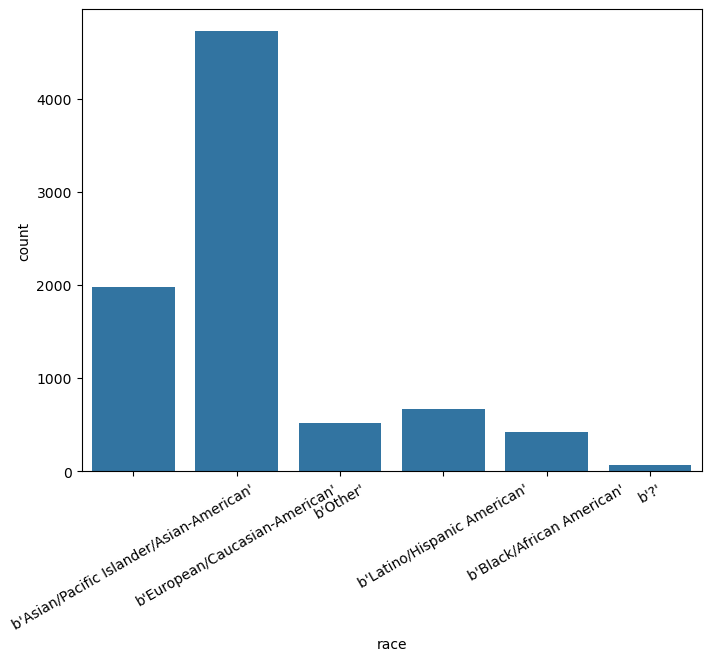

In [33]:
#Eh, not the clearest but for now.

plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=df)
plt.xticks(rotation=30);

In [37]:
step += 10
print(f"Currently looking at column indices {step} through {step+10}.")
object_df.describe().T[step:step+10]

Currently looking at column indices 10 through 20.


,count,unique,top,freq
d_pref_o_intelligence,8378,3,b'[16-20]',4272
d_pref_o_funny,8378,3,b'[16-20]',3870
d_pref_o_ambitious,8378,3,b'[0-15]',6680
d_pref_o_shared_interests,8378,3,b'[0-15]',6085
d_attractive_o,8378,3,b'[6-8]',4537
d_sinsere_o,8378,3,b'[6-8]',5192
d_intelligence_o,8378,3,b'[6-8]',5379
d_funny_o,8378,3,b'[6-8]',4645
d_ambitous_o,8378,3,b'[6-8]',4613
d_shared_interests_o,8378,3,b'[0-5]',4690


Nothing of interest to common save the finishing of o_prefs and now regular os.

If I neglect to comment anymore than please assume that I already addressed whatever relative pints elsewhere.

In [38]:
step += 10
print(f"Currently looking at column indices {step} through {step+10}.")
object_df.describe().T[step:step+10]

Currently looking at column indices 20 through 30.


,count,unique,top,freq
d_attractive_important,8378,3,b'[21-100]',3019
d_sincere_important,8378,3,b'[16-20]',3821
d_intellicence_important,8378,3,b'[16-20]',4276
d_funny_important,8378,3,b'[16-20]',3874
d_ambtition_important,8378,3,b'[0-15]',6680
d_shared_interests_important,8378,3,b'[0-15]',6083
d_attractive,8378,3,b'[6-8]',6231
d_sincere,8378,3,b'[9-10]',4084
d_intelligence,8378,3,b'[6-8]',4929
d_funny,8378,3,b'[6-8]',4244


In [39]:
step += 10
print(f"Currently looking at column indices {step} through {step+10}.")
object_df.describe().T[step:step+10]

Currently looking at column indices 30 through 40.


,count,unique,top,freq
d_ambition,8378,3,b'[6-8]',4407
d_attractive_partner,8378,3,b'[6-8]',4545
d_sincere_partner,8378,3,b'[6-8]',5198
d_intelligence_partner,8378,3,b'[6-8]',5385
d_funny_partner,8378,3,b'[6-8]',4651
d_ambition_partner,8378,3,b'[6-8]',4618
d_shared_interests_partner,8378,3,b'[0-5]',4686
d_sports,8378,3,b'[6-8]',3239
d_tvsports,8378,3,b'[0-5]',5219
d_exercise,8378,3,b'[6-8]',3718


In [40]:
step += 10
print(f"Currently looking at column indices {step} through {step+10}.")
object_df.describe().T[step:step+10]

Currently looking at column indices 40 through 50.


,count,unique,top,freq
d_dining,8378,3,b'[6-8]',4147
d_museums,8378,3,b'[6-8]',4299
d_art,8378,3,b'[6-8]',3994
d_hiking,8378,3,b'[0-5]',3751
d_gaming,8378,3,b'[0-5]',6109
d_clubbing,8378,3,b'[6-8]',3831
d_reading,8378,3,b'[6-8]',3659
d_tv,8378,3,b'[0-5]',4158
d_theater,8378,3,b'[6-8]',3906
d_movies,8378,3,b'[6-8]',4152


In [41]:
step += 10
print(f"Currently looking at column indices {step} through {step+10}.")
object_df.describe().T[step:step+10]

Currently looking at column indices 50 through 60.


,count,unique,top,freq
d_concerts,8378,3,b'[6-8]',4179
d_music,8378,3,b'[6-8]',3941
d_shopping,8378,3,b'[0-5]',3975
d_yoga,8378,3,b'[0-5]',5444
d_interests_correlate,8378,3,b'[0-0.33]',3063
d_expected_happy_with_sd_people,8378,3,b'[5-6]',4036
d_expected_num_interested_in_me,8378,3,b'[0-3]',7346
d_expected_num_matches,8378,3,b'[0-2]',4514
d_like,8378,3,b'[6-8]',4827
d_guess_prob_liked,8378,3,b'[5-6]',3199


In [42]:
step += 10
print(f"Currently looking at column indices {step} through {step+10}.")
object_df.describe().T[step:step+10]

Currently looking at column indices 60 through 70.


,count,unique,top,freq
decision,8378,2,b'0',4860
decision_o,8378,2,b'0',4863
match,8378,2,b'0',6998


And now we see the final and likely most important columns.

I'm assuming a match is only made if both said yes (seemingly per a quick view via df.loc[:5, ['decision', 'decision_o', 'match']].

Hmm, as expected, but pleasing to confirm, male yes and female yes are essentially independent. Well, that's not technically being observed by this, but essentially.... Eh, fine we'll formally do it later.

Regardless, matchee and match are independent (math a bit off, but likely via data errors). Tangentially, a bit sad to see that the rate is so high - unsure what to compare it to but it's like you're just trying to get to know somebody and 58% going to say no??? Mind you, perhaps this crowd is more marriage oriented and are not merely their to find a new friend/get friend-zoned.

In [43]:
df['decision'].value_counts(normalize=True)

decision
b'0'    0.580091
b'1'    0.419909
Name: proportion, dtype: float64

In [44]:
df['decision_o'].value_counts(normalize=True)

decision_o
b'0'    0.580449
b'1'    0.419551
Name: proportion, dtype: float64

In [45]:
df['match'].value_counts(normalize=True)

match
b'0'    0.835283
b'1'    0.164717
Name: proportion, dtype: float64

In [46]:
df.loc[:5, ['decision', 'decision_o', 'match']]

,decision,decision_o,match
0,b'1',b'0',b'0'
1,b'1',b'0',b'0'
2,b'1',b'1',b'1'
3,b'1',b'1',b'1'
4,b'1',b'1',b'1'
5,b'0',b'1',b'0'


In [11]:
#Per issues later on with objects (at one point in the timeline):

numeric_df = df.select_dtypes(exclude=['object', 'string'])

In [12]:
#Hmm, eh, I guess we'll deal with them on a case by case basis. We'll start I guess with the first 10 or so:
step = 0

In [13]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
numeric_df.describe().T[step-10:step]

Currently looking at column indices 0 through 10.


,count,mean,std,min,25%,50%,75%,max
wave,8378.0,11.350919,5.995903,1.0,7.00,11.00,15.00,21.0
age,8283.0,26.358928,3.566763,18.0,24.00,26.00,28.00,55.0
age_o,8274.0,26.364999,3.563648,18.0,24.00,26.00,28.00,55.0
d_age,8378.0,4.185605,4.596171,0.0,1.00,3.00,5.00,37.0
importance_same_race,8299.0,3.784793,2.845708,0.0,1.00,3.00,6.00,10.0
importance_same_religion,8299.0,3.651645,2.805237,1.0,1.00,3.00,6.00,10.0
pref_o_attractive,8289.0,22.495347,12.569802,0.0,15.00,20.00,25.00,100.0
pref_o_sincere,8289.0,17.396867,7.044003,0.0,15.00,18.37,20.00,60.0
pref_o_intelligence,8289.0,20.270759,6.782895,0.0,17.39,20.00,23.81,50.0
pref_o_funny,8280.0,17.459714,6.085526,0.0,15.00,18.00,20.00,50.0


Well, besides just trying to understand what the features are, let's also comment on their distributions.

So too the cadance of my comments:

Wave seems to be the dating round a person has. Theoretically it shouldn't matter, but pragmatically people maybe more/less as the evening continues as they get more tired, frustrated, desperate, etc..

Age vs. age o - hmm, seemingnly  is other/opposite. Ie the age of their date.

d-age - yeah, this should just be those two minus each other.

Importances are self-understood.

Pref os should be their rating for hte other. Recall our earlier comment. re. wave.

~~~~
~~~~

A bit confused on the way this event ran t had such a hisogram. Perhaps it stopped whenever people found a match.

Odd that ages are the same. Seemingly it would show the perspectives of both genders. Ie so the data is essentially duplicated. Well, raw biographical details - but the default perspectives would be different. Ie men value attractiveness more than women. Might be worth seperating the two.

Nice to see that the mean and median essentially match up. Once again let's seperate them by gender later. From what I recall from my actuarial intership is that we assume by default the male is 3 years older than the female. So, coming with that is likely an "adjustment" of sorts. Ie the male of 30 is likely the most compatible with a female of 27. Hence, their various preferences across their spectrums line up with the age discrepency. Or, maybe not as that's just the average and each couple are unique and bottom line men are on average 3 years older than their spouses. Regardless...

Tangentially we'll need to consider expected differences in homosexual dating trends as well. Potentially also having to seperate hetero and homosexual dating trends. Ie when it comes to age - is their a similar age discrepency with one partner generally having an "older_figure" role/position or not? Similarly, is the sincerity factor different for what the homosexual male desires in his (male) partner than his heterosexual friend in his (female) partner?

Seemingly d_age is absolute values. Regardless, see the actuarial trend here. Of note are the extremes (10ish) which are unexpected in this culture, assuming the data came from a Western land, to have such discrepencies at lower ages. Ie given there's a 10 year age gap it's more likely to be present in a 55-45 couple than a 35-25 (I hope such a statement is obvious). A fun anecdote from high school was when I observed Jackie Kennedy's age to be 6 years less than her husband John, wondering how they could have made that work? History and jokes aside, I've agreed to go out with a spectrum consisting of 9 years younger and 8 years older.

Importants are essentially the same, with race being slightly more significant than religion. Would be interesting to see their correlation (.43). Oh, note as high as I thought, but still quite related.

Regardless, their scale seems to be on a 0-10 with 10 being very important. Of note is how different are races and religions: Would Lorenzo even consider Nerissa, let alone Jessica? Couldn't resist the Merchant of Venice reference, but the point remains clear. I recall another fun anecdote that made far too many of my mentors laugh.

Religious matters aside, it makes sense than people essentially want a "fe/male" counter to themselves that is still like them. Then again, maybe not if it's not even a 4. Sigh, the "joys" of working without a data dictionary.

Re. the prefs- for sure attractiveness is 0-100; likely the others are too. Or, maybe not; eh, seems weird then that just sincere is till 60. So, we have attractiveness and intelligence being skewed to the right; sincerity and funny to the left. Particularly with sincerity we have a decent discrepency, potentially aided by our interesting max of 60.

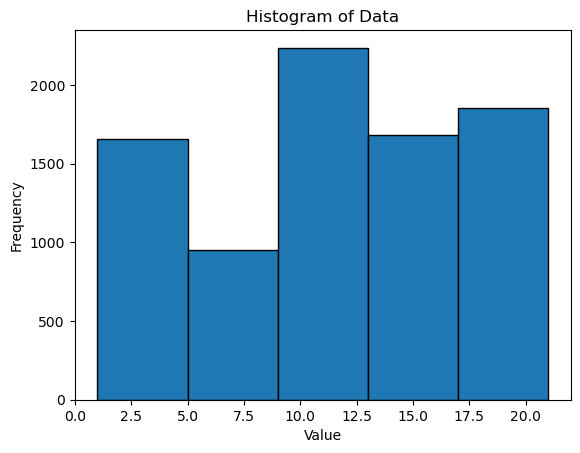

In [14]:
#Sigh, back to chatGPT. I won't bother to spruce it up at least for the initial push.

plt.hist(df['wave'], bins=5, edgecolor='black')

plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency');

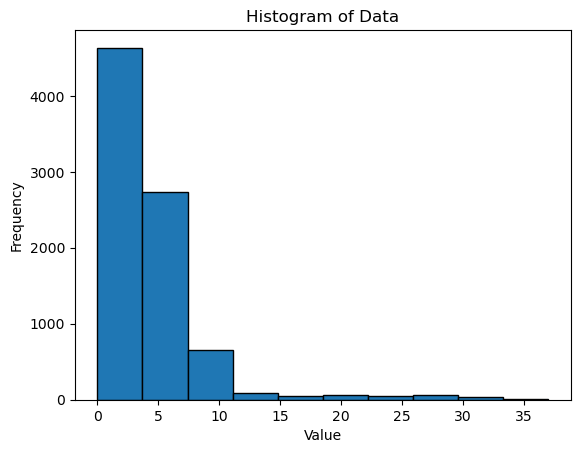

In [15]:
#Eh, good enough for now.

plt.hist(df['d_age'], bins=10, edgecolor='black')

plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency');

In [16]:
print(df['importance_same_race'].corr(df['importance_same_religion']))

0.4302836159762406


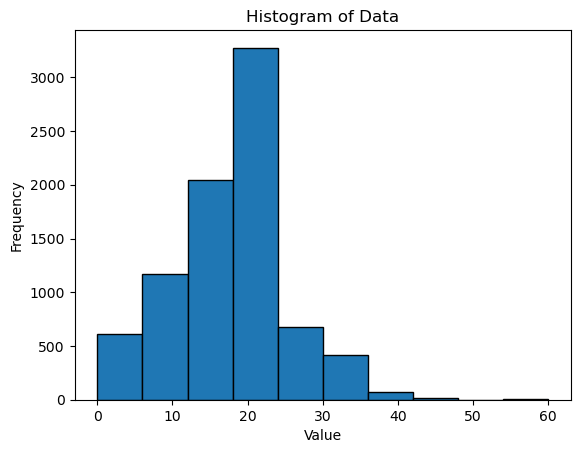

In [17]:
plt.hist(df['pref_o_sincere'], bins=10, edgecolor='black')

plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency');

In [18]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
numeric_df.describe().T[step-10:step]

Currently looking at column indices 10 through 20.


,count,mean,std,min,25%,50%,75%,max
pref_o_ambitious,8271.0,10.685375,6.126544,0.0,5.00,10.00,15.0,53.0
pref_o_shared_interests,8249.0,11.845930,6.362746,0.0,9.52,10.64,16.0,30.0
attractive_o,8166.0,6.190411,1.950305,0.0,5.00,6.00,8.0,10.5
sinsere_o,8091.0,7.175256,1.740575,0.0,6.00,7.00,8.0,10.0
intelligence_o,8072.0,7.369301,1.550501,0.0,6.00,7.00,8.0,10.0
funny_o,8018.0,6.400599,1.954078,0.0,5.00,7.00,8.0,11.0
ambitous_o,7656.0,6.778409,1.794080,0.0,6.00,7.00,8.0,10.0
shared_interests_o,7302.0,5.474870,2.156163,0.0,4.00,6.00,7.0,10.0
attractive_important,8299.0,22.514632,12.587674,0.0,15.00,20.00,25.0,100.0
sincere_important,8299.0,17.396389,7.046700,0.0,15.00,18.18,20.0,60.0


Rest of prefs are self_understood. So, to recap that's 6 attributes these events focused on.

Then, the manifestation of their dates.

Hmm, then after that we have an "importance" of likely now the 6 attributes, starting with attractiv and sincere. Perhaps alluding to the group of things that are "nice to have" but not ultimately needed. Ie yeah a guy has a preference for more attractive woman but doesn't need it. Anyways, more on that later.

~~~
~~~

Oh wow, of interest are these first two traits. Presumably ona  similar scal as the previous 4, yet much lower. These two are slightly skewed t oth right. And, notice their medians and means are roughly half of the first four.

Of note to me is to comment: Heh, knew it was overrated the shared interests camp. Sure, you have to not loathe and ideally support their interests. But, bottom line does it matter? No.

Re. the opposites: Wooooowwwww. Assuming it's the same scale, which I'm inclined to believe when the max funny is 11 (unless that was a typeo) then see the difference between imagination land/Prince/ess Charming Neverland and reality. First three are slightly skewed to the right; then to the left.

Upon this, recall that this is a mere speed dating event. Pragmatically, such scales of attractive maybe manifest - but likely their initial impressions are judged more critically. Even attractiveness oh so often grows after just a little bit of time together and appreciating one another.

Re. the importants - Likely it would behoove us to make interaction effects of whatever scale between them and their preferred counterparts (and on that note including their date as well).

So, attractive is decently to the right. Honestly rivaling soo close and makes me wonder if the discrepency are just nulls and these 6 columns are tatology (sp?). For now we continue.

In [19]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
numeric_df.describe().T[step-10:step]

Currently looking at column indices 20 through 30.


,count,mean,std,min,25%,50%,75%,max
intellicence_important,8299.0,20.265613,6.783003,0.0,17.39,20.00,23.81,50.0
funny_important,8289.0,17.457043,6.085239,0.0,15.00,18.00,20.00,50.0
ambtition_important,8279.0,10.682539,6.124888,0.0,5.00,10.00,15.00,53.0
shared_interests_important,8257.0,11.845111,6.362154,0.0,9.52,10.64,16.00,30.0
attractive,8273.0,7.084733,1.395783,2.0,6.00,7.00,8.00,10.0
sincere,8273.0,8.294935,1.407460,2.0,8.00,8.00,9.00,10.0
intelligence,8273.0,7.704460,1.564321,2.0,7.00,8.00,9.00,10.0
funny,8273.0,8.403965,1.076608,3.0,8.00,8.00,9.00,10.0
ambition,8273.0,7.578388,1.778315,2.0,7.00,8.00,9.00,10.0
attractive_partner,8176.0,6.189995,1.950169,0.0,5.00,6.00,8.00,10.0


Continuation of the importants. See above.

Hmm, now plain 'ol attributes (save shared interests). I guess I'll break cadance: All of these are higher than the other. Seemingly this is a self-evaluation. And, it basically suggests that everybody holds a higher opinion of themselves than others do about said person. I think the greatest discrepency is funny, which I honestly find quite funny and ironic with the mean being 2 points higher than the other's evaluation!

Likely it's also behoove us to have interaction effects between them.

Hmm, and what's this last one of attractive partner??? This now seems to be very close to attractive_o. Perhaps whatever the trend with pref and important is playing out again.

In [20]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
numeric_df.describe().T[step-10:step]

Currently looking at column indices 30 through 40.


,count,mean,std,min,25%,50%,75%,max
sincere_partner,8101.0,7.175164,1.740315,0.0,6.0,7.0,8.0,10.0
intelligence_partner,8082.0,7.368597,1.550453,0.0,6.0,7.0,8.0,10.0
funny_partner,8028.0,6.400598,1.953702,0.0,5.0,7.0,8.0,10.0
ambition_partner,7666.0,6.777524,1.794055,0.0,6.0,7.0,8.0,10.0
shared_interests_partner,7311.0,5.474559,2.156363,0.0,4.0,6.0,7.0,10.0
sports,8299.0,6.425232,2.619024,1.0,4.0,7.0,9.0,10.0
tvsports,8299.0,4.575491,2.801874,1.0,2.0,4.0,7.0,10.0
exercise,8299.0,6.245813,2.418858,1.0,5.0,6.0,8.0,10.0
dining,8299.0,7.783829,1.754868,1.0,7.0,8.0,9.0,10.0
museums,8299.0,6.985781,2.052232,0.0,6.0,7.0,9.0,10.0


See above re. the partner.

Now we seem to be analyziing specific hobbies and the like. Each come with various cultural, physical, emotional, etc. tags that I won't bother to comment on them by default.

However, on a general level notice that they're overall lower than various traits. Phew, I am relieved to see that. However, dining does seem to be quite important to many people.

In [21]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
numeric_df.describe().T[step-10:step]

Currently looking at column indices 40 through 50.


,count,mean,std,min,25%,50%,75%,max
art,8299.0,6.714544,2.263407,0.0,5.0,7.0,8.0,10.0
hiking,8299.0,5.737077,2.570207,0.0,4.0,6.0,8.0,10.0
gaming,8299.0,3.881191,2.620507,0.0,2.0,3.0,6.0,14.0
clubbing,8299.0,5.745993,2.502218,0.0,4.0,6.0,8.0,10.0
reading,8299.0,7.678515,2.006565,1.0,7.0,8.0,9.0,13.0
tv,8299.0,5.304133,2.529135,1.0,3.0,6.0,7.0,10.0
theater,8299.0,6.776118,2.235152,0.0,5.0,7.0,9.0,10.0
movies,8299.0,7.919629,1.700927,0.0,7.0,8.0,9.0,10.0
concerts,8299.0,6.825401,2.156283,0.0,5.0,7.0,8.0,10.0
music,8299.0,7.851066,1.791827,1.0,7.0,8.0,9.0,10.0


See above re. hobbies.

What stands out is gaming with a much much lower of a mean and median than the rest. Ironically, it has a 14 max though.... And likely that is deliberate when the typcical max is just 10, making me wonder what is this scale and how many games that person must have toughed it out with dial-up internet (recall that the data is from 2002-2004. Hence, in that context, it's understandable why it's so much lower - as it's a releatively evant-garde phenomena (sp?), especially with the adults in that dating pool. While likely I would be on the upper ranks in my value of such a pasttime, I wouldn't be dating for many more years after this study concluded...

Also, observe the max from reading as well.

In [22]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
numeric_df.describe().T[step-10:step]

Currently looking at column indices 50 through 60.


,count,mean,std,min,25%,50%,75%,max
shopping,8299.0,5.631281,2.608913,1.00,4.00,6.00,8.00,10.00
yoga,8299.0,4.339197,2.717612,0.00,2.00,4.00,7.00,10.00
interests_correlate,8220.0,0.196010,0.303539,-0.83,-0.02,0.21,0.43,0.91
expected_happy_with_sd_people,8277.0,5.534131,1.734059,1.00,5.00,6.00,7.00,10.00
expected_num_interested_in_me,1800.0,5.570556,4.762569,0.00,2.00,4.00,8.00,20.00
expected_num_matches,7205.0,3.207814,2.444813,0.00,2.00,3.00,4.00,18.00
like,8138.0,6.134087,1.841285,0.00,5.00,6.00,7.00,10.00
guess_prob_liked,8069.0,5.207523,2.129565,0.00,4.00,5.00,7.00,10.00
met,8003.0,0.049856,0.282168,0.00,0.00,0.00,0.00,8.00


Yoga is also quite low. Likely as it's more of a 'female' hobby so you'd generally only have one gender of even potentially caring about it.

Hmm, the interests correlate feauture is interesting to me. See previous discussion. Regardless, notice their scale (being a correlation). Slightly skewed to the left. Note that ultimately couples have a pretty weak correlation of .2, supporting what we wrote earlier.

Oh, these next ones are much different than the others. I'll take a break then continue.
Continuing:

Expected happy with sd people. Hmm, is sd standard deviation or standard? Regardless, it's some type of gauge. Unsure if it's referring to the dater or the datee. So too with the following.

Expcted numbr interested in me and the like (including 'like') seem self-understod.

Anyways, onto their numeric trends: expected happy is to the left; num is to the right with quite a skew. Potentially supporting that 'chad' mentality the kids call it nowadays where one boss/ess gets all the girls/boys.

Quite an interesting spread of exp num of matches. Somewhat close to being normal, yet that max is crazy.... Potentially an outlier. Harkening back to the 'wave' column this is potentially dependent on that.

Like is quite normal, which is good (heh). Semingly the scale is 0-10 (and so on).

Guess is quite skewed to the left.

Met... hmm, are these dates that pannedout in reality? Hence the abysmal scores. Unsurprising unfotunately as I'm personanlly pessimistic of the effectiveness of speed-dating (and the expectations of people that go to such events).

In [23]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
numeric_df.describe().T[step-10:step]

Currently looking at column indices 60 through 70.


,count,mean,std,min,25%,50%,75%,max


In [24]:
print(df.columns[step-10:step])

Index(['attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner',
       'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner',
       'd_funny_partner'],
      dtype='object')


In [25]:
df[df.columns[step-10:step]]

,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner
0,6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]'
1,7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]'
2,5.0,8.0,9.0,8.0,5.0,7.0,b'[0-5]',b'[6-8]',b'[9-10]',b'[6-8]'
3,7.0,6.0,8.0,7.0,6.0,8.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]'
4,5.0,6.0,7.0,7.0,6.0,6.0,b'[0-5]',b'[6-8]',b'[6-8]',b'[6-8]'
...,...,...,...,...,...,...,...,...,...,...
8373,3.0,5.0,5.0,5.0,NaN,NaN,b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]'
8374,4.0,6.0,8.0,4.0,4.0,NaN,b'[0-5]',b'[6-8]',b'[6-8]',b'[0-5]'
8375,4.0,7.0,8.0,8.0,8.0,NaN,b'[0-5]',b'[6-8]',b'[6-8]',b'[6-8]'
8376,4.0,6.0,5.0,4.0,NaN,5.0,b'[0-5]',b'[6-8]',b'[0-5]',b'[0-5]'


In [26]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
df.describe().T[step-10:step]

Currently looking at column indices 70 through 80.


,count,mean,std,min,25%,50%,75%,max


In [27]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
df.describe().T[step-10:step]

Currently looking at column indices 80 through 90.


,count,mean,std,min,25%,50%,75%,max


In [28]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
df.describe().T[step-10:step]

Currently looking at column indices 90 through 100.


,count,mean,std,min,25%,50%,75%,max


In [29]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
df.describe().T[step-10:step]

Currently looking at column indices 100 through 110.


,count,mean,std,min,25%,50%,75%,max


In [30]:
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
df.describe().T[step-10:step]

Currently looking at column indices 110 through 120.


,count,mean,std,min,25%,50%,75%,max


In [31]:
##
step += 10
print(f"Currently looking at column indices {step-10} through {step}.")
df.describe().T[step-10:step]

Currently looking at column indices 120 through 130.


,count,mean,std,min,25%,50%,75%,max


To do list:

cnfirm d-age is age - age_o
confirm the peferencs are differnet than the importants